In [16]:
#Wissahickon Mean Elevation Profile

# these lines tell python which `packages' of commands we want to use
import numpy as np # for math
import pandas as pd # to load the spreadsheet
from matplotlib import pyplot as plt # for plotting

In [17]:
# this line imports the data from the spreadsheet and saves it as an array
qgisdata = np.asarray(pd.read_csv('Data/qgis-profiles.csv',header=1))

# convert the data from meters to ft
qgisdata = qgisdata*0.3048

# these lines save every other column starting from the 0th column as the horizontal distace (dvals) and every other column starting from the 1st column as elevation (zvals), for the raw data in qgisdata
zvals = qgisdata[:,1::2]
dvals = qgisdata[:,::2]

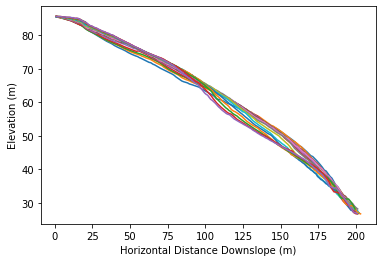

In [18]:
# this line plots the raw profiles
plt.plot(dvals,zvals)

# this gives the plot labels and displays it
plt.xlabel('Horizontal Distance Downslope (m)')
plt.ylabel('Elevation (m)')
plt.show()

In [19]:
# lets make bins in elevation at every meter
zbinwidth = 1
# this line defines the elevations we want for bin edges
# it goes from the lowest elevation to the highest at intervals of zbinwidth
# we use nanmin and nanmax instead of min and max because the profiles have different lengths, so when we imported the data from the spreadsheet into the array, the empty cells get defined as NaNs (Not A Number)
zbins = np.arange(np.nanmin(qgisdata[:,1::2]),np.nanmax(qgisdata[:,1::2]),zbinwidth)
# bin midpoints (for plotting) need to be defined as the right edge of the bins minus half the binwidth
zbinmids = zbins[1:] - zbinwidth/2

In [20]:
# lets get the mean and standard deviation for each bin

# first define the arrays that will store the mean and std distances for each elevation bin
dmean = np.empty_like(zbinmids)
dstd  = np.empty_like(zbinmids)

for i in range(len(zbinmids)): # loop through each zbin
    # saving each calculation to the appropriate index in each empty array...
    dmean[i] = np.nanmean(dvals[(zvals>zbins[i])&(zvals<=zbins[i+1])]) # here we get the mean (omitting NaNs) of all the dvals where zval is greater than the lower value of zbin and less than or equal to the upper value of zbin, for this index i
    dstd[i]  = np.nanstd(dvals[(zvals>zbins[i])&(zvals<=zbins[i+1])]) # same as above but for standard deviation this time

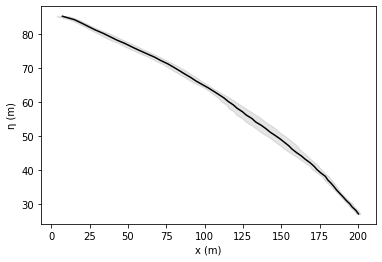

In [21]:
# the line plots the mean profile
plt.plot(dmean,zbinmids,c='k') #dmean: distance, zbinmids: elevation

# this line plots a shaded region 1 standard deviation on either side of the mean
plt.fill_betweenx(zbinmids,dmean-dstd,dmean+dstd,color='k',alpha=0.1)

# this gives the plot labels and displays it
plt.xlabel('x (m)') #horizontal distance downslope
plt.ylabel('\u03B7 (m)') #elevation
plt.show()

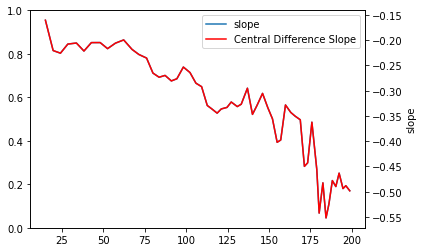

In [22]:
########central-difference slope function to generate slope v. distance

x = dmean
y = zbinmids

#central difference slope
increment = 1
slopes = []

for i in range(1, len(x) - 1):
    #slope = ((y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1]))*-1
    slope = ((y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1]))
    slopes.append(slope)

#plot params
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

small_x = x[1:-1]  #remove endpoints to match the length of slopes

ax2.plot(small_x, slopes, label = 'slope') #change in slope (elevation over distance)

plt.plot(small_x, slopes, label='Central Difference Slope', color='red') #slope
plt.xlabel('x (m)') #horizontal distance downslope
plt.ylabel('slope')
plt.legend()
plt.show()

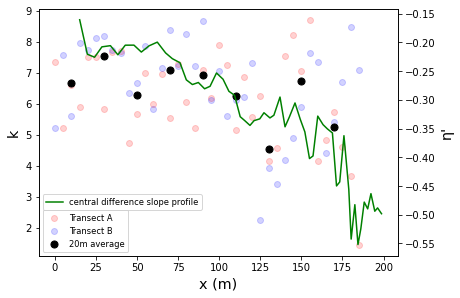

In [23]:
###same plot as above but with central difference slope profile instead of elevation

#this will plot Fig. 4b

#4cm fit with horizontal distance bins

#A
horizontalDistance = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185]
strength_NewFit4 = [1.46069529431772,3.66276856759201,4.62028587052259,5.71772148815039,4.84032458898698,4.16968035060889,8.70685652231528,7.05862802381337,8.20116784565843,7.53194864725190,4.57602310197904,4.16136236787930,6.23889837228590,5.57157515187443,6.84976723318989,5.16140868729895,7.25827618247245,7.89280077632600,6.17306674623934,7.09150699618691,5.20986377752403,6.05463563653816,7.28256118959566,5.53055034031763,6.97385664249996,5.98513155814400,6.99800475491082,5.66149542133164,4.74014964253773,7.69925360607909,7.67052051571970,5.83445921699391,7.49088327050103,7.49587619029314,5.88523202492525,6.61300260167280,5.22690237720679,7.33862766186036]

#B
strengthB_NewFit4 = [7.10124621725569,8.45822657973749,6.70842719271834,5.40664634999315,4.42790115932990,7.35830232567128,7.64743002347055,5.89615891293771,4.90369044874708,4.18956200409885,3.40569831437610,3.93657956446348,2.23868286320845,7.30195672137615,6.22385231840132,6.11030507552950,5.59060485991608,7.06902465578604,6.12937693530358,8.66463928655012,7.22269807868879,8.23638570819514,7.21783791394409,8.37164876227245,7.14227265932037,5.84418528144715,7.85052750465054,6.66753646606884,6.33869514149754,7.63993768450090,7.72138753461137,8.19563472466020,8.11570234787450,7.73862155211442,7.95603518119425,5.61765188997892,7.55866066499411,5.22892615454663]

#20 m fit means averaging every 5 strength values --> will then need to reverse (see combined strength bins that are reverse indexed)
TransectAB_bins_4 = [10, 30, 50, 70, 90, 110, 130, 150, 170]
TransectA_strength_bins_4 = [4.06,7.03,5.63,6.21,6.59,6.46,5.85,7.17,6.51]
TransectB_strength_bins_4 = [6.42,6.45,3.44,6.31,7.27,7.74,6.68,7.92,6.82]
Combined_strength_bins_4 = [5.24,6.74,4.54,6.26,6.93,7.1,6.27,7.55,6.67]

#plotting
figB4, ax1B4 = plt.subplots()
ax1B4.scatter(horizontalDistance, strength_NewFit4[::-1], color = 'r', label = 'Transect A', alpha = 0.175)
ax1B4.scatter(horizontalDistance, strengthB_NewFit4[::-1], color = 'b', label = 'Transect B', alpha = 0.175)
ax1B4.scatter(TransectAB_bins_4, Combined_strength_bins_4[::-1], color = 'black', label = '20m average', s = 50)
ax2B4 = ax1B4.twinx()
ddmeanB4 = dmean[::-1]
zzbinmidsB4 = zbinmids[::-1]
ax2B4.plot(small_x, slopes, color = 'g', label = 'central difference slope profile') #swapped slope with elevation profile
#ax2B4.plot(distance_interpolated, slopes1, label='Slope vs. Distance', color='blue')
figB4.tight_layout()
plt.ylabel('\u03B7' "'", fontsize = 'x-large') #elevation
ax1B4.set_xlabel('x (m)', fontsize = 'x-large') #horizontal distance downslope
ax1B4.set_ylabel('k', fontsize = 'x-large') #stiffness (little k)
ax1B4.legend(fontsize = 'small')
ax2B4.legend()
ax2B4.legend(loc = (0.0115,0.185), fontsize = 'small')
plt.show()

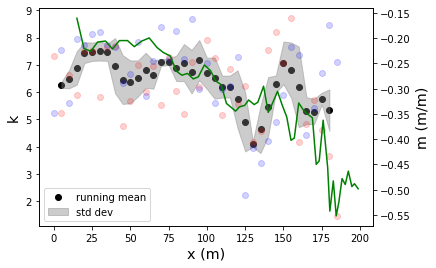

In [24]:
#### Attempt 4 ####

import numpy as np # for math
import pandas as pd # to load the spreadsheet
from matplotlib import pyplot as plt # for plotting

def running_mean(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def running_std(data, window_size):
    return np.std([data[i:i+window_size] for i in range(len(data)-window_size+1)], axis=1)

#####Strength Data
#A
horizontalDistance = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185]
strength_NewFit4 = [1.46069529431772,3.66276856759201,4.62028587052259,5.71772148815039,4.84032458898698,4.16968035060889,8.70685652231528,7.05862802381337,8.20116784565843,7.53194864725190,4.57602310197904,4.16136236787930,6.23889837228590,5.57157515187443,6.84976723318989,5.16140868729895,7.25827618247245,7.89280077632600,6.17306674623934,7.09150699618691,5.20986377752403,6.05463563653816,7.28256118959566,5.53055034031763,6.97385664249996,5.98513155814400,6.99800475491082,5.66149542133164,4.74014964253773,7.69925360607909,7.67052051571970,5.83445921699391,7.49088327050103,7.49587619029314,5.88523202492525,6.61300260167280,5.22690237720679,7.33862766186036]

#B
strengthB_NewFit4 = [7.10124621725569,8.45822657973749,6.70842719271834,5.40664634999315,4.42790115932990,7.35830232567128,7.64743002347055,5.89615891293771,4.90369044874708,4.18956200409885,3.40569831437610,3.93657956446348,2.23868286320845,7.30195672137615,6.22385231840132,6.11030507552950,5.59060485991608,7.06902465578604,6.12937693530358,8.66463928655012,7.22269807868879,8.23638570819514,7.21783791394409,8.37164876227245,7.14227265932037,5.84418528144715,7.85052750465054,6.66753646606884,6.33869514149754,7.63993768450090,7.72138753461137,8.19563472466020,8.11570234787450,7.73862155211442,7.95603518119425,5.61765188997892,7.55866066499411,5.22892615454663]

####Slope Data
x = dmean
y = zbinmids

#central difference slope
increment = 1
slopes = []

for i in range(1, len(x) - 1):
    #slope = ((y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1]))*-1
    slope = ((y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1]))
    slopes.append(slope)

#plot params
#fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

small_x = x[1:-1]  #remove endpoints to match the length of slopes

#ax2.plot(small_x, slopes, label = 'slope') #change in slope (elevation over distance)

#plt.plot(small_x, slopes, label='Central Difference Slope', color='red') #slope
#plt.xlabel('x (m)') #horizontal distance downslope
#plt.ylabel('slope')
#plt.legend()
#plt.show()

#strength variables from transect a & b
#print(strength_NewFit4)
#print(strengthB_NewFit4)

#combine lists across elements
combined_data = np.mean([strength_NewFit4, strengthB_NewFit4], axis=0)

#window params
window_size = 3 #can only be odd #'s...

#window size of 1 actually gives the mean between transects a & b
## in this case, there is no standard deviation envelope, as the true mean is plotted


#running mean and std dev
mean = running_mean(combined_data, window_size)
std = running_std(combined_data, window_size)

#distance var
distance = horizontalDistance[window_size//2: len(combined_data) - window_size//2]

#### plot params

fignew, axnew = plt.subplots()

#running mean and std dev plot
plt.scatter(distance, mean[::-1], label='running mean', color = 'black')
plt.fill_between(distance, (mean-std)[::-1], (mean+std)[::-1], alpha=0.4, label='std dev', color = 'grey')
plt.xlabel('x (m)', fontsize = 'x-large')
plt.ylabel('k', fontsize = 'x-large')
plt.legend()

#raw data in background
axnew.scatter(horizontalDistance, strength_NewFit4[::-1], color = 'r', label = 'Transect A', alpha = 0.175)
axnew.scatter(horizontalDistance, strengthB_NewFit4[::-1], color = 'b', label = 'Transect B', alpha = 0.175)

#central difference slope plot 
axM4 = axnew.twinx()
axM4.plot(small_x, slopes, color = 'green', label = 'central difference slope profile')
#axM4.set_ylabel('\u0394' "m", fontsize = 'x-large')
axM4.set_ylabel("m (m/m)", fontsize = 'x-large')

plt.show()

#print(mean[::-1])
#print(np.mean(mean[::-1][0:19]))
#print(np.mean(mean[::-1][20:35]))

In [18]:
###New Hillslope Profile

import numpy as np # for math
import pandas as pd # to load the spreadsheet
from matplotlib import pyplot as plt # for plotting

In [19]:
# this line imports the data from the spreadsheet and saves it as an array
qgisdata_new = np.asarray(pd.read_csv('Data/qgis-profiles-new.csv',header=1))

# convert the data from meters to ft
qgisdata_new = qgisdata_new*0.3048

# these lines save every other column starting from the 0th column as the horizontal distace (dvals) and every other column starting from the 1st column as elevation (zvals), for the raw data in qgisdata
zvals_new = qgisdata_new[:,1::2]
dvals_new = qgisdata_new[:,::2]

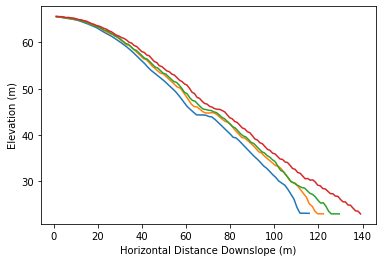

In [20]:
# this line plots the raw profiles
plt.plot(dvals_new,zvals_new)

# this gives the plot labels and displays it
plt.xlabel('Horizontal Distance Downslope (m)')
plt.ylabel('Elevation (m)')
plt.show()

In [21]:
# lets make bins in elevation at every meter
zbinwidth_new = 1
# this line defines the elevations we want for bin edges
# it goes from the lowest elevation to the highest at intervals of zbinwidth
# we use nanmin and nanmax instead of min and max because the profiles have different lengths, so when we imported the data from the spreadsheet into the array, the empty cells get defined as NaNs (Not A Number)
zbins_new = np.arange(np.nanmin(qgisdata_new[:,1::2]),np.nanmax(qgisdata_new[:,1::2]),zbinwidth)
# bin midpoints (for plotting) need to be defined as the right edge of the bins minus half the binwidth
zbinmids_new = zbins_new[1:] - zbinwidth_new/2

In [22]:
# lets get the mean and standard deviation for each bin

# first define the arrays that will store the mean and std distances for each elevation bin
dmean_new = np.empty_like(zbinmids_new)
dstd_new  = np.empty_like(zbinmids_new)

for i in range(len(zbinmids_new)): # loop through each zbin
    # saving each calculation to the appropriate index in each empty array...
    dmean_new[i] = np.nanmean(dvals_new[(zvals_new>zbins_new[i])&(zvals_new<=zbins_new[i+1])]) # here we get the mean (omitting NaNs) of all the dvals where zval is greater than the lower value of zbin and less than or equal to the upper value of zbin, for this index i
    dstd_new[i]  = np.nanstd(dvals_new[(zvals_new>zbins_new[i])&(zvals_new<=zbins_new[i+1])]) # same as above but for standard deviation this time

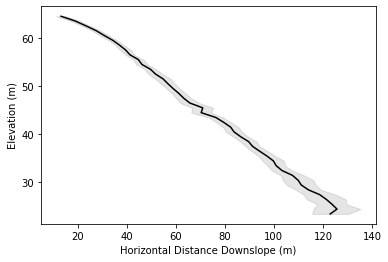

<Figure size 432x288 with 0 Axes>

In [23]:
# the line plots the mean profile
plt.plot(dmean_new,zbinmids_new,c='k')
# this line plots a shaded region 1 standard deviation on either side of the mean
plt.fill_betweenx(zbinmids_new,dmean_new-dstd_new,dmean_new+dstd_new,color='k',alpha=0.1)

# this gives the plot labels and displays it
plt.xlabel('Horizontal Distance Downslope (m)')
plt.ylabel('Elevation (m)')
plt.show()
plt.savefig('new_slope_mean_elevProf.png')